In [143]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, Dense, LeakyReLU
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import cross_val_score


# 데이터셋 로드

In [144]:
train_path = 'train/'
test_path =  'test/'

# 데이터 어그멘테이션

## train generator 생성

In [58]:
size = (300, 300)
train_generator = ImageDataGenerator(horizontal_flip=True,
                                     vertical_flip=False,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     rescale=1/255,
                                     #validation_split=0.2
                                    )

test_generator = ImageDataGenerator(#horizontal_flip=True,
                                    #vertical_flip=True,
                                    rescale=1/255,
                                    validation_split=0.2)

# Training set
train_set = train_generator.flow_from_directory(train_path,
                                           batch_size=16,
                                           class_mode='binary',
                                           target_size= size,
                                           color_mode='rgb',
                                           shuffle=False,
                                           #subset='training'
                                            )
# Validation set
validation_set = test_generator.flow_from_directory(train_path,
                                           batch_size=16,
                                           class_mode='binary',
                                           target_size= size,
                                           color_mode='rgb',
                                           #shuffle=False,
                                           subset='training'
                                            )

# Test set / no output available
test_set = test_generator.flow_from_directory(test_path,
                                         batch_size=16,
                                         class_mode='binary',
                                         target_size= size,
                                         color_mode='rgb',
                                         #shuffle=False
                                         subset='validation',
                                        )

Found 2041 images belonging to 2 classes.
Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


## 콜백

In [145]:
early_stop= tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Good Performance Model Architecture

In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (600, 600, 3), activation=LeakyReLU(alpha=0.15)))
model.add(MaxPool2D(pool_size=(2,2), strides=2)) #if stride not given it equal to pool filter size
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
# 27 89 148 52

model = Sequential()
model.add(Conv2D(48, (3,3), input_shape = (96, 96, 3), activation=LeakyReLU(alpha=0.15)))
model.add(MaxPool2D(pool_size=(2,2), strides=2)) #if stride not given it equal to pool filter size
model.add(Conv2D(48, (3,3), activation = 'relu')) #Leaky is ok
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(units=192,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
# Not bad


model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape = (224, 224, 3), activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
#model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
#model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
#model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(BatchNormalization())

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
#model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(BatchNormalization())

model.add(Flatten())
#model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))
#adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=1e-5)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
# Very Good 0.0445 0.9927 0.1135, 0.9590 

# 모델 설계 및 학습

In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape = (300, 300, 3), activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
#model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
#model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
#model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(BatchNormalization())

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
#model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(BatchNormalization())

model.add(Flatten())
#model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))
#adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=1e-5)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
#model.summary()

hist = model.fit(train_set,
               validation_data = validation_set,
               epochs=1000,
               callbacks=[early_stop])

# 그나마 괜찮은 구조.
#model.add(Conv2D(32, (3,3), input_shape = (96, 96, 3), activation=LeakyReLU(alpha=0.15)))
#model.add(MaxPool2D(pool_size=(2,2), strides=2)) #if stride not given it equal to pool filter size

#model.add(Conv2D(64, (3,3), activation = LeakyReLU(alpha=0.15)))
#model.add(MaxPool2D(pool_size=(2,2), strides=2))

Epoch 1/1000
128/128 [==============================] - 53s 364ms/step - loss: 0.8561 - accuracy: 0.5669 - val_loss: 0.9115 - val_accuracy: 0.4703
Epoch 2/1000
128/128 [==============================] - 44s 340ms/step - loss: 0.7226 - accuracy: 0.6026 - val_loss: 0.9363 - val_accuracy: 0.4703
Epoch 3/1000
128/128 [==============================] - 43s 338ms/step - loss: 0.6610 - accuracy: 0.6227 - val_loss: 0.7068 - val_accuracy: 0.5113
Epoch 4/1000
128/128 [==============================] - 43s 337ms/step - loss: 0.6222 - accuracy: 0.6673 - val_loss: 0.6256 - val_accuracy: 0.6552
Epoch 5/1000
128/128 [==============================] - 43s 337ms/step - loss: 0.5613 - accuracy: 0.7202 - val_loss: 0.5317 - val_accuracy: 0.7361
Epoch 6/1000
128/128 [==============================] - 43s 339ms/step - loss: 0.5699 - accuracy: 0.7085 - val_loss: 0.4908 - val_accuracy: 0.7557
Epoch 7/1000
128/128 [==============================] - 43s 338ms/step - loss: 0.5374 - accuracy: 0.7286 - val_loss: 0

128/128 [==============================] - 43s 336ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.0293 - val_accuracy: 0.9878
Epoch 112/1000
128/128 [==============================] - 43s 336ms/step - loss: 0.0058 - accuracy: 0.9995 - val_loss: 0.0227 - val_accuracy: 0.9933
Epoch 113/1000
128/128 [==============================] - 43s 336ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 0.9927
Epoch 114/1000
128/128 [==============================] - 43s 336ms/step - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.0303 - val_accuracy: 0.9902
Epoch 115/1000
128/128 [==============================] - 43s 336ms/step - loss: 0.0045 - accuracy: 0.9995 - val_loss: 0.0469 - val_accuracy: 0.9841
Epoch 116/1000
128/128 [==============================] - 43s 337ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9920
Epoch 117/1000
128/128 [==============================] - 43s 336ms/step - loss: 0.0056 - accuracy: 0.9995 - val_loss: 0.

## 모델 확인

In [5]:
# 모델 저장
#model.save('model_test.h5')


model = load_model('model.h5')

# 라벨 확인
print (test_set.class_indices)

# 모델 평가
score = model.evaluate(validation_set, verbose=1)
print (score)

# 모델 예측
predict = model.predict(test_set, verbose=1)
print (predict)

{'training_fake': 0, 'training_real': 1}
103/103 [==============================] - 29s 187ms/step - loss: 0.0290 - accuracy: 0.9908
[0.029024582356214523, 0.9908144474029541]
26/26 [==============================] - 6s 231ms/step
[[9.98637736e-01]
 [9.99997377e-01]
 [3.71308270e-05]
 [6.57288649e-04]
 [9.54193413e-01]
 [2.60395900e-04]
 [1.78191047e-02]
 [2.19906750e-03]
 [2.37911149e-06]
 [9.88119066e-01]
 [2.64405418e-04]
 [9.99393940e-01]
 [9.99915361e-01]
 [6.25406563e-01]
 [9.99119818e-01]
 [9.75652874e-01]
 [1.26365834e-04]
 [9.99515533e-01]
 [4.53324243e-02]
 [9.70776618e-01]
 [7.68390205e-03]
 [8.52192938e-01]
 [9.99360025e-01]
 [5.29397368e-01]
 [3.04805963e-05]
 [9.99967813e-01]
 [9.99994516e-01]
 [1.15869595e-02]
 [9.79014099e-01]
 [1.18141924e-03]
 [9.99997139e-01]
 [2.65844457e-04]
 [9.97043026e-06]
 [9.99347031e-01]
 [9.99992371e-01]
 [9.96002853e-01]
 [5.12778945e-02]
 [9.98815775e-01]
 [9.95453715e-01]
 [2.27241311e-04]
 [9.55057389e-04]
 [9.97511148e-01]
 [9.99763429e

In [8]:
score = model.evaluate(test_set, verbose=1)
print (score)

26/26 [==============================] - 2s 94ms/step - loss: 0.0530 - accuracy: 0.9755
[0.05301842838525772, 0.9754902124404907]


# 시각화

In [6]:
import matplotlib.pyplot as plt

epochs = 120
xc = range(epochs)
#fig, ax = plt.subplots(1, 2)
#ax[0].plot(hist.history['accuracy'], c='b', label='train acc')
#ax[0].plot(hist.history['val_accuracy'], c='r', label='val acc')
#ax[1].plot(hist.history['loss'], c='r', label='loss')
#ax[0].legend()
#ax[1].legend()
#plt.show()

# ax[0].plot(xc, hist.history['loss'])
# ax[0].plot(xc, hist.history['val_loss'])
# plt.xlabel('num of Epochs')
# plt.ylabel('loss')
# plt.title('training loss vs val loss')
# ax[0].grid(True)
# ax[0].legend(['train', 'val'])
# plt.style.use(['classic'])


# #ax[1].figure(2,figsize=(7,5))
# ax[1].plot(xc, hist.history['accuracy'])
# ax[1].plot(xc,hist.history['val_accuracy'])
# plt.xlabel('num of Epochs')
# plt.ylabel('accuracy')
# plt.title('train_acc vs val_acc')
# ax[1].grid(True)
# ax[1].legend(['train','val'],loc=4)
# #print plt.style.available # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])
# plt.show()


#epochs = 43
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

NameError: name 'hist' is not defined

In [96]:
print (test_set[0])

(array([[[[0.6039216 , 0.54901963, 0.49803925],
         [0.6156863 , 0.5529412 , 0.5019608 ],
         [0.6156863 , 0.5529412 , 0.5019608 ],
         ...,
         [0.62352943, 0.627451  , 0.60784316],
         [0.62352943, 0.627451  , 0.60784316],
         [0.62352943, 0.627451  , 0.60784316]],

        [[0.6156863 , 0.5529412 , 0.5019608 ],
         [0.6156863 , 0.5529412 , 0.5019608 ],
         [0.62352943, 0.5529412 , 0.5058824 ],
         ...,
         [0.627451  , 0.6313726 , 0.6117647 ],
         [0.627451  , 0.6313726 , 0.6117647 ],
         [0.627451  , 0.6313726 , 0.6117647 ]],

        [[0.61960787, 0.54901963, 0.5019608 ],
         [0.62352943, 0.5529412 , 0.5058824 ],
         [0.6313726 , 0.5529412 , 0.50980395],
         ...,
         [0.6313726 , 0.6313726 , 0.62352943],
         [0.6313726 , 0.6313726 , 0.62352943],
         [0.6313726 , 0.6313726 , 0.62352943]],

        ...,

        [[0.16862746, 0.2509804 , 0.41960788],
         [0.16078432, 0.24705884, 0.40784317

In [100]:
result = model.predict(test_set)
print (result)

print (len(result))

[[9.99968529e-01]
 [2.67008389e-03]
 [9.99780715e-01]
 [6.85512740e-03]
 [2.91630677e-05]
 [9.88119066e-01]
 [6.40554863e-05]
 [9.99871135e-01]
 [9.99792993e-01]
 [4.43413585e-01]
 [7.36402231e-04]
 [1.26365834e-04]
 [4.71333135e-03]
 [9.99788225e-01]
 [1.65118877e-07]
 [9.99762237e-01]
 [9.99024034e-01]
 [9.99387145e-01]
 [4.57162765e-04]
 [1.95147350e-05]
 [1.35655301e-02]
 [1.15869595e-02]
 [7.78519288e-02]
 [9.99505162e-01]
 [9.99517202e-01]
 [6.40620201e-05]
 [2.49654458e-05]
 [9.99976754e-01]
 [9.99991059e-01]
 [3.77840579e-01]
 [9.99957323e-01]
 [9.99987841e-01]
 [4.18754946e-03]
 [9.99575078e-01]
 [9.99996305e-01]
 [8.06895878e-06]
 [9.89843190e-01]
 [8.29828456e-02]
 [8.18204626e-06]
 [9.99997377e-01]
 [9.73014474e-01]
 [4.63332435e-06]
 [9.70776618e-01]
 [8.70721340e-01]
 [9.99982476e-01]
 [9.99243379e-01]
 [9.99998331e-01]
 [9.98869002e-01]
 [9.99575078e-01]
 [2.22861454e-05]
 [3.55483535e-05]
 [9.89923656e-01]
 [2.00258306e-04]
 [5.33088110e-04]
 [6.67404115e-01]
 [9.999718

In [109]:
for i in result:
    print (i)
    #r = model.predict_classes(i)
    #print (r)
    break

[0.9999685]


# True/False 확인

In [193]:
#from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import cv2
size = (300, 300)

def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, size)
    return image[..., ::-1]

fake_images = os.listdir('./test/training_fake/')

FP = 0
TP = 0


for i in fake_images:
    test_image = load_img('./test/training_fake/' + i )
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)/255.
    pc_result = model.predict_classes(test_image)
    #p_result = model.predict(test_image)
    #result = np.argmax(model.predict(test_image), axis=-1)
    #print ('{}'.format(i))
    #print ("[*] Class : {}".format(pc_result))
    #print ("[*] Predict: {}".format(p_result))
    #print (result)

    
    #print ("[*] {} : {}".format(i, pc_result))
    if pc_result[0][0] == 0:
        print ("[*] Fake : {}".format(i))
        TP += 1
    
    else:
        print ("[*] True : {}".format(i))
        FP += 1
        
    #print (f"{i}: {prediction[0]}")
    

print (f"[*] FP : {FP}")
print (f"[*] TP : {TP}")

FN = 0
precision = TP / (TP + FP)
recall = TP / (TP + FN)

F1 = 2 * (precision * recall) / (precision + recall)
print ("[*] F1 : {}".format(F1))


[*] Fake : easy_100_1111.jpg
[*] Fake : easy_101_0010.jpg
[*] True : easy_102_0101.jpg
[*] Fake : easy_103_1111.jpg
[*] Fake : easy_104_1000.jpg
[*] Fake : easy_105_1100.jpg
[*] Fake : easy_106_0011.jpg
[*] Fake : easy_107_1011.jpg
[*] Fake : easy_108_1111.jpg
[*] Fake : easy_109_1111.jpg
[*] Fake : easy_10_0001.jpg
[*] Fake : easy_110_0001.jpg
[*] Fake : easy_111_1101.jpg
[*] Fake : easy_112_1001.jpg
[*] Fake : easy_113_0011.jpg
[*] Fake : easy_114_1110.jpg
[*] Fake : easy_115_0010.jpg
[*] Fake : easy_116_111.jpg
[*] Fake : easy_117_0101.jpg
[*] Fake : easy_118_1111.jpg
[*] Fake : easy_119_0011.jpg
[*] Fake : easy_11_1111.jpg
[*] Fake : easy_120_0011.jpg
[*] Fake : easy_121_0011.jpg
[*] Fake : easy_122_1011.jpg
[*] Fake : easy_123_0100.jpg
[*] Fake : easy_124_1110.jpg
[*] Fake : easy_125_0011.jpg
[*] Fake : easy_126_0111.jpg
[*] Fake : easy_127_0001.jpg
[*] Fake : easy_128_0111.jpg
[*] Fake : easy_129_1111.jpg
[*] Fake : easy_12_1110.jpg
[*] Fake : easy_130_1101.jpg
[*] Fake : easy_13

[*] Fake : hard_147_1111.jpg
[*] Fake : hard_148_1010.jpg
[*] Fake : hard_149_0011.jpg
[*] Fake : hard_14_1111.jpg
[*] Fake : hard_150_1000.jpg
[*] Fake : hard_151_0101.jpg
[*] Fake : hard_152_0111.jpg
[*] Fake : hard_153_1011.jpg
[*] Fake : hard_154_1100.jpg
[*] Fake : hard_155_0010.jpg
[*] Fake : hard_156_1111.jpg
[*] Fake : hard_157_1111.jpg
[*] Fake : hard_158_0011.jpg
[*] Fake : hard_159_0100.jpg
[*] Fake : hard_15_1111.jpg
[*] Fake : hard_160_1111.jpg
[*] Fake : hard_161_1100.jpg
[*] Fake : hard_162_0010.jpg
[*] Fake : hard_163_0011.jpg
[*] Fake : hard_164_1000.jpg
[*] Fake : hard_165_1000.jpg
[*] Fake : hard_166_1110.jpg
[*] Fake : hard_167_0011.jpg
[*] Fake : hard_168_0011.jpg
[*] Fake : hard_169_0111.jpg
[*] Fake : hard_16_1111.jpg
[*] Fake : hard_170_0111.jpg
[*] Fake : hard_171_1101.jpg
[*] Fake : hard_172_1100.jpg
[*] Fake : hard_173_1110.jpg
[*] Fake : hard_174_1111.jpg
[*] Fake : hard_175_1100.jpg
[*] Fake : hard_176_0011.jpg
[*] True : hard_177_1011.jpg
[*] Fake : hard_1

[*] Fake : mid_194_1111.jpg
[*] Fake : mid_195_1111.jpg
[*] Fake : mid_196_1100.jpg
[*] Fake : mid_197_1110.jpg
[*] Fake : mid_198_1111.jpg
[*] Fake : mid_199_0011.jpg
[*] Fake : mid_19_1000.jpg
[*] Fake : mid_1_1101.jpg
[*] Fake : mid_200_1111.jpg
[*] Fake : mid_201_1111.jpg
[*] Fake : mid_202_1110.jpg
[*] Fake : mid_203_1111.jpg
[*] Fake : mid_204_1111.jpg
[*] Fake : mid_205_0011.jpg
[*] Fake : mid_206_1111.jpg
[*] Fake : mid_207_1111.jpg
[*] Fake : mid_208_1110.jpg
[*] Fake : mid_209_1111.jpg
[*] Fake : mid_20_1111.jpg
[*] Fake : mid_210_0011.jpg
[*] Fake : mid_211_1100.jpg
[*] Fake : mid_212_1111.jpg
[*] Fake : mid_213_1111.jpg
[*] Fake : mid_214_1011.jpg
[*] Fake : mid_215_0011.jpg
[*] Fake : mid_216_1011.jpg
[*] Fake : mid_217_1111.jpg
[*] Fake : mid_218_1011.jpg
[*] Fake : mid_219_1111.jpg
[*] Fake : mid_21_0011.jpg
[*] Fake : mid_220_0011.jpg
[*] Fake : mid_221_1100.jpg
[*] Fake : mid_222_1110.jpg
[*] Fake : mid_223_1111.jpg
[*] Fake : mid_224_1111.jpg
[*] Fake : mid_225_0111.j

[*] Fake : mid_459_1001.jpg
[*] Fake : mid_45_0010.jpg
[*] Fake : mid_460_1111.jpg
[*] Fake : mid_461_1100.jpg
[*] Fake : mid_462_1101.jpg
[*] Fake : mid_463_0100.jpg
[*] Fake : mid_464_1111.jpg
[*] Fake : mid_465_1111.jpg
[*] Fake : mid_466_1111.jpg
[*] Fake : mid_467_1111.jpg
[*] Fake : mid_468_1110.jpg
[*] Fake : mid_469_1111.jpg
[*] Fake : mid_46_1111.jpg
[*] Fake : mid_470_1001.jpg
[*] Fake : mid_471_1111.jpg
[*] Fake : mid_472_1101.jpg
[*] Fake : mid_473_0011.jpg
[*] Fake : mid_474_1110.jpg
[*] Fake : mid_475_1111.jpg
[*] Fake : mid_476_1111.jpg
[*] Fake : mid_477_1100.jpg
[*] Fake : mid_478_1101.jpg
[*] Fake : mid_479_1111.jpg
[*] Fake : mid_47_1110.jpg
[*] Fake : mid_480_1111.jpg
[*] Fake : mid_48_1111.jpg
[*] Fake : mid_49_1111.jpg
[*] Fake : mid_4_1111.jpg
[*] Fake : mid_50_1111.jpg
[*] Fake : mid_51_1111.jpg
[*] Fake : mid_52_1111.jpg
[*] Fake : mid_53_1100.jpg
[*] Fake : mid_54_1111.jpg
[*] Fake : mid_55_1111.jpg
[*] Fake : mid_56_1111.jpg
[*] Fake : mid_57_1111.jpg
[*] Fak

In [125]:
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt


fake_images = os.listdir('./test/training_fake/')
false_positive = 0
positive = 0

for i in fake_images:
    img1 = image.load_img('./test/training_fake/' + i, target_size=(96, 96))
    img = image.img_to_array(img1)
    img = img/255
    # create a batch of size 1 [N,H,W,C]
    img = np.expand_dims(img, axis=0)
    prediction = model2.predict(img, batch_size=None, steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Real :%1.2f'%(prediction[0,0])
        plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
        print (i + ": real")
    else:
        value ='Fake :%1.2f'%(1.0-prediction[0,0])
        #plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
        print (i + ": fake")

    #plt.imshow(img1)
    #plt.show()

easy_100_1111.jpg: real
easy_101_0010.jpg: fake
easy_102_0101.jpg: real
easy_103_1111.jpg: real
easy_104_1000.jpg: fake
easy_105_1100.jpg: fake
easy_106_0011.jpg: fake
easy_107_1011.jpg: fake
easy_108_1111.jpg: real
easy_109_1111.jpg: fake
easy_10_0001.jpg: fake
easy_110_0001.jpg: fake
easy_111_1101.jpg: fake
easy_112_1001.jpg: real
easy_113_0011.jpg: fake
easy_114_1110.jpg: fake
easy_115_0010.jpg: fake
easy_116_111.jpg: fake
easy_117_0101.jpg: fake
easy_118_1111.jpg: fake
easy_119_0011.jpg: real
easy_11_1111.jpg: real
easy_120_0011.jpg: fake
easy_121_0011.jpg: fake
easy_122_1011.jpg: fake
easy_123_0100.jpg: real
easy_124_1110.jpg: fake
easy_125_0011.jpg: fake
easy_126_0111.jpg: real
easy_127_0001.jpg: fake
easy_128_0111.jpg: fake
easy_129_1111.jpg: fake
easy_12_1110.jpg: fake
easy_130_1101.jpg: fake
easy_131_1001.jpg: fake
easy_132_0110.jpg: real
easy_133_1100.jpg: real
easy_134_0001.jpg: fake
easy_135_0011.jpg: fake
easy_136_0111.jpg: fake
easy_137_0001.jpg: fake
easy_138_0101.jpg: f

hard_203_0010.jpg: fake
hard_204_0011.jpg: real
hard_205_0011.jpg: fake
hard_206_0001.jpg: fake
hard_207_1100.jpg: fake
hard_208_0001.jpg: fake
hard_209_1011.jpg: fake
hard_20_1111.jpg: fake
hard_210_1100.jpg: fake
hard_211_0110.jpg: fake
hard_212_1101.jpg: fake
hard_213_0101.jpg: fake
hard_214_1011.jpg: fake
hard_215_1101.jpg: fake
hard_216_0111.jpg: fake
hard_217_1100.jpg: fake
hard_218_0100.jpg: fake
hard_219_1101.jpg: fake
hard_21_1101.jpg: fake
hard_220_1111.jpg: fake
hard_221_0101.jpg: fake
hard_222_1001.jpg: fake
hard_223_1111.jpg: fake
hard_224_0111.jpg: fake
hard_225_0011.jpg: fake
hard_226_0100.jpg: fake
hard_227_1100.jpg: fake
hard_228_1111.jpg: fake
hard_229_0100.jpg: fake
hard_22_1111.jpg: fake
hard_230_1110.jpg: fake
hard_231_1111.jpg: fake
hard_232_0001.jpg: fake
hard_233_0010.jpg: fake
hard_234_1100.jpg: fake
hard_235_0001.jpg: fake
hard_236_1001.jpg: fake
hard_237_0010.jpg: fake
hard_238_1000.jpg: fake
hard_239_1000.jpg: fake
hard_23_1110.jpg: fake
hard_240_1101.jpg: f

mid_311_0011.jpg: fake
mid_312_1111.jpg: fake
mid_313_1101.jpg: fake
mid_314_1101.jpg: fake
mid_315_1101.jpg: fake
mid_316_1111.jpg: fake
mid_317_1101.jpg: fake
mid_318_1111.jpg: fake
mid_319_1111.jpg: fake
mid_31_1111.jpg: fake
mid_320_1111.jpg: fake
mid_321_1110.jpg: fake
mid_322_1111.jpg: fake
mid_323_1101.jpg: fake
mid_324_1111.jpg: fake
mid_325_0011.jpg: fake
mid_326_1111.jpg: fake
mid_327_0111.jpg: fake
mid_328_0011.jpg: fake
mid_329_1110.jpg: fake
mid_32_1111.jpg: fake
mid_330_1111.jpg: fake
mid_331_0011.jpg: fake
mid_332_1111.jpg: fake
mid_333_1101.jpg: fake
mid_334_1111.jpg: fake
mid_335_1100.jpg: fake
mid_336_1111.jpg: fake
mid_337_1111.jpg: fake
mid_338_1100.jpg: fake
mid_339_1100.jpg: fake
mid_33_1011.jpg: fake
mid_340_1111.jpg: fake
mid_341_1110.jpg: fake
mid_342_1110.jpg: fake
mid_343_1111.jpg: fake
mid_344_0010.jpg: fake
mid_345_1111.jpg: fake
mid_346_0011.jpg: fake
mid_347_0011.jpg: fake
mid_348_1100.jpg: fake
mid_349_1111.jpg: fake
mid_34_1111.jpg: fake
mid_350_0100.jp

# 파일 리스트 추출 및 라벨 생성

## Training

In [248]:
train_frames = list()

fake_fnames = os.listdir(train_path + 'training_fake/')
for i in range(len(fake_fnames)):
    #print (fake_fnames[i])
    train_frame = list()
    try:
        fake_fname_label = fake_fnames[i].split('.')[0].split('_')[-1]
        train_frame.append(fake_fnames[i])
        train_frame.append(fake_fname_label[0])
        train_frame.append(fake_fname_label[1])
        train_frame.append(fake_fname_label[2])
        train_frame.append(fake_fname_label[3])
        train_frames.append(train_frame)
    except:
        pass

print (len(train_frames))
print (train_frames[0])

959
['easy_100_1111.jpg', '1', '1', '1', '1']


## Test

In [249]:
test_frames = list()

fake_fnames = os.listdir(test_path + 'training_fake/')
for i in range(len(fake_fnames)):
    #print (fake_fnames[i])
    test_frame = list()
    try:
        fake_fname_label = fake_fnames[i].split('.')[0].split('_')[-1]
        test_frame.append(fake_fnames[i])
        test_frame.append(fake_fname_label[0])
        test_frame.append(fake_fname_label[1])
        test_frame.append(fake_fname_label[2])
        test_frame.append(fake_fname_label[3])
        test_frames.append(test_frame)
    except:
        pass

print (len(test_frames))
print (test_frames[0])

959
['easy_100_1111.jpg', '1', '1', '1', '1']


# 데이터 프레임 생성

In [365]:
import pandas as pd

train_df = pd.DataFrame(train_frames, columns=['filename','left_eye', 'right_eye', 'nose', 'mouth'])
test_df = pd.DataFrame(test_frames, columns=['filename','left_eye', 'right_eye', 'nose', 'mouth'])

train_df['label'] = train_df['left_eye'] + train_df['right_eye'] + train_df['nose'] + train_df['mouth']
test_df['label'] = test_df['left_eye'] + test_df['right_eye'] + test_df['nose'] + test_df['mouth']

In [370]:
train_df

,filename,left_eye,right_eye,nose,mouth,label
0,easy_100_1111.jpg,1,1,1,1,1111
1,easy_101_0010.jpg,0,0,1,0,0010
2,easy_102_0101.jpg,0,1,0,1,0101
3,easy_103_1111.jpg,1,1,1,1,1111
4,easy_104_1000.jpg,1,0,0,0,1000
...,...,...,...,...,...,...
954,mid_96_1111.jpg,1,1,1,1,1111
955,mid_97_1111.jpg,1,1,1,1,1111
956,mid_98_1111.jpg,1,1,1,1,1111
957,mid_99_1100.jpg,1,1,0,0,1100


# Augmentation

# 피처, 라벨 분리

In [319]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape = (300, 300, 3), activation='relu'))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    #model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
    #model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
    model.add(MaxPool2D(pool_size=(2,2))) 

    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    #model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
    #model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    #model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
    #model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
    model.add(MaxPool2D(pool_size=(2,2))) 
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    #model.add(MaxPool2D(pool_size=(2, 2), dim_ordering="th"))
    #model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
    model.add(MaxPool2D(pool_size=(2,2))) 
    model.add(BatchNormalization())

    model.add(Flatten())
    #model.add(Dropout(0.1))
    model.add(Dense(units=128, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(units=15, activation='softmax'))
    #adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    rmsprop = tf.keras.optimizers.RMSprop(learning_rate=1e-5)
    model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])

    return model

In [320]:
locate_model = get_model()

In [400]:
# import numpy as np
# import cv2
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import img_to_array

# size = (300, 300, 3)

# train_image = list()
# for i in range(len(train_df['filename'])):
#     fullpath = 'train/training_fake/' + train_df['filename'][i]
#     img = image.load_img(fullpath, target_size=(300, 300, 3))
#     img = img_to_array(img) / 255.
#     train_image.append(img)

# X_train = np.array(train_image)


# # train_target = (train_df.values.tolist())
# # for i in range(len(train_target)):
# #     train_target[i] = train_target[i][1:]

    
# # y_train = np.array(train_target)


# test_image = list()
# for i in range(len(test_df['filename'])):
#     fullpath = 'test/training_fake/' + test_df['filename'][i]
#     img2 = image.load_img(fullpath, target_size=(300, 300, 3))
#     img2 = img_to_array(img2) / 255.
#     #img2 = img2.astype('float32') / 255.
#     test_image.append(img2)

    
# X_test = np.array(test_image)


# # test_target = (test_df.values.tolist())
# # for i in range(len(test_target)):
# #     test_target[i] = test_target[i][1:]

# # y_test = np.array(test_target)


# print (X_train.shape)
# #print (y_train.shape)
# print (X_test.shape)
# #print (y_test.shape)



In [401]:
# import matplotlib.pyplot as plt
# plt.imshow(X_test[15])

In [402]:
train_df['mouth'][15]

'0'

In [230]:
y_train = np.array(train_df.drop(['filename'], axis=1))
y_test = np.array(test_df.drop(['filename'], axis=1))

print (y_train.shape)
print (y_test.shape)

(959, 4)
(959, 4)


In [231]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(959, 300, 300, 3)
(959, 4)
(959, 300, 300, 3)
(959, 4)


In [327]:
columns = ['left_eye', 'right_eye', 'nose', 'mouth']

train_gen = ImageDataGenerator(#featurewise_center = True,
                               #featurewise_std_normalization = True,
                               #width_shift_range=0.2,
                               #height_shift_range=0.2,
                               #rescale = 1./255.,
                               #rotation_range = 15,
                               #vertical_flip = False,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               #fill_mode='nearest'
                               )


test_gen = ImageDataGenerator(#rescale=1./255.,
                             validation_split=0.2)


# train_set = train_gen.flow(X_train,
#                            y_train,
#                            batch_size=32,
#                            shuffle = False,
#                            save_to_dir='./hidden/preview', save_format='jpeg')


# valid_set = test_gen.flow(X_test,
#                           y_test,
#                           batch_size = 32,
#                           shuffle = False,
#                           subset='training',
#                           save_to_dir='./hidden/preview', save_format='jpeg')
    

# test_set = test_gen.flow(X_test,
#                          y_test,
#                          #class_mode='categorical',
#                          shuffle = None,
#                          subset='validation',
#                          save_to_dir='./hidden/preview', save_format='jpeg')

train_set = train_gen.flow_from_dataframe(dataframe=train_df,
                                          directory="./train/training_fake/", x_cols="filename",
                                          y_col = "label",
                                          class_mode = "categorical",
                                          target_size=(300, 300),
                                          batch_size=16,
                                          save_to_dir='./hidden/preview', 
                                          save_format='jpeg')


valid_set = test_gen.flow_from_dataframe(dataframe=test_df,
                                         directory="./test/training_fake/", x_cols="filename",
                                         y_col="label",
                                         class_mode="categorical",
                                         target_size=(300, 300),
                                         batch_size=16,
                                         subset='training',
                                         save_to_dir='./hidden/preview', 
                                         save_format='jpeg')
    

test_set = test_gen.flow_from_dataframe(dataframe=test_df,
                                        class_mode="categorical",
                                        directory="./test/training_fake/", x_cols="filename",
                                        y_col="label",
                                        subset="validation",
                                        batch_size=1)


Found 959 validated image filenames belonging to 15 classes.
Found 768 validated image filenames belonging to 15 classes.
Found 191 validated image filenames belonging to 15 classes.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckPoint


model_path = MODEL_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'

cb_checkpoint = ModelCheck(filepath=model_path, monitor='val_loss', save_best_only = True, verbose=1)

In [328]:
# histo = locate_model.fit(train_set, 
#                   steps_per_epoch = len(train_set),
#                   validation_data = valid_set,
#                   validation_steps = len(valid_set),
#                   epochs=5,
#                   callbacks=[early_stop],
#                   verbose=1)



histo = locate_model.fit(train_set,
                  #steps_per_epoch = len(X_train),
                  validation_data = valid_set,
                #   validation_steps = len(X_test),
                  epochs=30,
                  callbacks=[early_stop],
                  verbose=1)

Epoch 1/30
60/60 [==============================] - 28s 450ms/step - loss: 2.6597 - accuracy: 0.2398 - val_loss: 2.6383 - val_accuracy: 0.1042
Epoch 2/30
60/60 [==============================] - 26s 433ms/step - loss: 2.1798 - accuracy: 0.3337 - val_loss: 2.1416 - val_accuracy: 0.3255
Epoch 3/30
60/60 [==============================] - 27s 446ms/step - loss: 1.9864 - accuracy: 0.3618 - val_loss: 1.7780 - val_accuracy: 0.5039
Epoch 4/30
60/60 [==============================] - 26s 437ms/step - loss: 1.7601 - accuracy: 0.4400 - val_loss: 1.4567 - val_accuracy: 0.5885
Epoch 5/30
60/60 [==============================] - 27s 449ms/step - loss: 1.5997 - accuracy: 0.4974 - val_loss: 1.2186 - val_accuracy: 0.6953
Epoch 6/30
60/60 [==============================] - 27s 450ms/step - loss: 1.4576 - accuracy: 0.5109 - val_loss: 1.0327 - val_accuracy: 0.7565
Epoch 7/30
60/60 [==============================] - 27s 448ms/step - loss: 1.3304 - accuracy: 0.5787 - val_loss: 0.8571 - val_accuracy: 0.7943

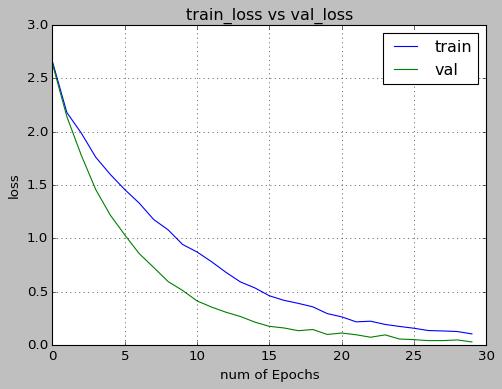

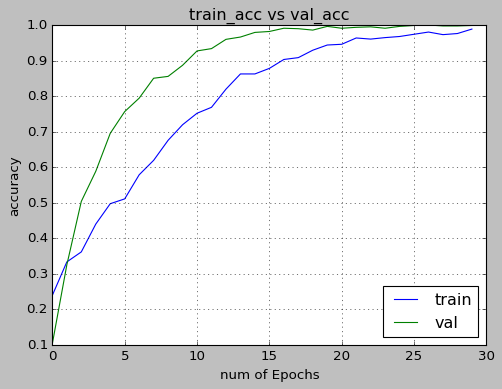

In [330]:
epochs = 30
xc = range(epochs)
train_loss = histo.history['loss']
val_loss = histo.history['val_loss']
train_acc = histo.history['accuracy']
val_acc = histo.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [407]:

img2 = image.load_img('test/training_fake/easy_9_1010.jpg', target_size=(300, 300, 3))
img2 = image.img_to_array(img2)
img2 = img2.reshape(-1, 300, 300, 3)

# 모델 평가
#score = model.evaluate(test_set[0], verbose=1)
#print (score)

# 모델 예측
#X_test_temp = X_test
# X_test = X_test.reshape(-1, 300, 300, 3)

#idx = 5
predict = np.argmax(locate_model.predict(img2, verbose=1), axis=1)
print (train_set.class_indices)
print (predict)
#plt.imshow(X_test[idx])
#test_df['filename'][idx]

1/1 [==============================] - 0s 13ms/step
{'0001': 0, '0010': 1, '0011': 2, '0100': 3, '0101': 4, '0110': 5, '0111': 6, '1000': 7, '1001': 8, '1010': 9, '1011': 10, '1100': 11, '1101': 12, '1110': 13, '1111': 14}
[9]


In [409]:

size = (300, 300)

def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, size)
    return image[..., ::-1]


FP = 0
TP = 0


#path2 = os.listdir('./test/training_fake/')
print (train_set.class_indices)
for i in fake_images:
    
    img = image.load_img('./test/training_fake/' + i, target_size=(300, 300, 3))
    img = image.img_to_array(img)
    img = img.reshape(-1, 300, 300, 3)
    
    pc_result = locate_model.predict_classes(img, verbose=1)

    fname = i.split('.')[0].split('_')[-1]
    real_label = train_set.class_indices[fname]
    print (i, real_label, pc_result[0])
    if real_label == pc_result[0]:
        TP += 1
        #print (i+ ": True")
    else:
        #print (real_label)
        FP += 1
        #print (i+ ": False")


print (f"[*] FP : {FP}")
print (f"[*] TP : {TP}")

FN = 0
precision = TP / (TP + FP)
recall = TP / (TP + FN)

F1 = 2 * (precision * recall) / (precision + recall)
print ("[*] F1 : {}".format(F1))


 14ms/step
11 11
mid_291_1100.jpg
1/1 [==============================] - 0s 12ms/step
11 11
mid_292_1000.jpg
1/1 [==============================] - 0s 13ms/step
7 7
mid_293_1101.jpg
1/1 [==============================] - 0s 12ms/step
12 12
mid_294_1110.jpg
1/1 [==============================] - 0s 11ms/step
13 13
mid_295_0111.jpg
1/1 [==============================] - 0s 13ms/step
6 6
mid_296_1111.jpg
1/1 [==============================] - 0s 13ms/step
14 14
mid_297_0010.jpg
1/1 [==============================] - 0s 12ms/step
1 1
mid_298_0001.jpg
1/1 [==============================] - 0s 12ms/step
0 0
mid_299_1100.jpg
1/1 [==============================] - 0s 13ms/step
11 11
mid_29_1111.jpg
1/1 [==============================] - 0s 12ms/step
14 14
mid_2_1101.jpg
1/1 [==============================] - 0s 12ms/step
12 12
mid_300_0111.jpg
1/1 [==============================] - 0s 13ms/step
6 6
mid_301_0101.jpg
1/1 [==============================] - 0s 13ms/step
4 4
mid_302_1100.jpg
1/1 [=

['left_eye' 'right_eye' 'nose' 'mouth' 'label']
easy_101_0010.jpg
[1 2 3 0]
right_eye (0.399)
nose (0.493)
mouth (0.532)
left_eye (0.608)


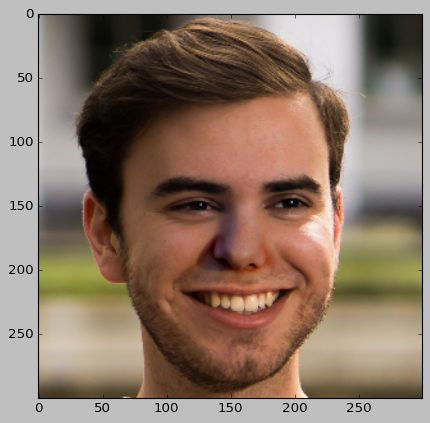

In [410]:
classes = np.array(train_df.columns[1:])
print (classes)
proba = model.predict(X_test_temp[1].reshape(-1, 300, 300, 3))
top_3 = np.argsort(proba[0])
print (test_df['filename'][1])
print (top_3)
for i in range(4):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(X_test_temp[1])